### Prompt
The Head of Technical Recruiting and VP of Engineering want to build out a set of metrics to improve our recruiting practices at Thumbtack. Using a hypothesis-driven approach, they’ve asked you to:
 - Identify <b>3-5 metrics you would track</b> on an ongoing basis
 - Analyze the existing data as it relates to these metrics and share the analysis in a separate sheet
 - Synthesize these trends in a 2-page google doc that also includes:
  - At least <b>3 things you would do to improve quarterly engineering hiring</b>
  - At least <b>3 charts to illustrate your findings</b>
  - A <b>list of any additional data you may want to analyze</b> at a later date


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Talent_Operations_Analyst_Take_Home_Data_Set.csv')

# Filter the dataset to only show the roles mentioned in the prompt
df = df[df['Req'].isin(['FE','SWE','Mobile','SRE'])].reset_index(drop=True)

# Exploratory Data Analysis

In [3]:
print(' Rows: {} \n Columns: {}'.format(df.shape[0],df.shape[1]))

 Rows: 1278 
 Columns: 13


In [4]:
df.head()

,Candidate_Id,Recruiter,Job,Source,referral_tag,Recommendation,Current_Stage_Name,Current_Status,Scorecard_Stage,Req,Department,Week_Submitted,Meta Source
0,1,Karen Tjhan,Front End Engineer,Sourcing (LinkedIn),NaN,Yes,Phone Screen,rejected,Phone Screen,FE,Eng,7/23/2017,Sourcing
1,2,Justin Lee,Front End Engineer,Sourcing (LinkedIn),NaN,Yes,Round 1,rejected,Phone Screen,FE,Eng,9/24/2017,Sourcing
2,4,Justin Lee,Front End Engineer,LinkedIn (Prospecting),NaN,No Decision,Take Home Exercise,rejected,Phone Screen,FE,Eng,2/26/2017,Prospecting
3,7,NaN,Software Engineer,Sourcing (LinkedIn),NaN,No,Phone Screen,rejected,Phone Screen,SWE,Eng,10/1/2017,Sourcing
4,8,Mawulom Nenonene,Front End Engineer,LinkedIn (Prospecting),NaN,No,Phone Screen,rejected,Phone Screen,FE,Eng,6/18/2017,Prospecting


In [5]:
# Get an understanding of 
print('Total Unique Values for Each Columns \n', df.nunique(),'\n \n',
      'Total Null Values for Each Column \n', df.isnull().sum()
     )

Total Unique Values for Each Columns 
 Candidate_Id          1278
Recruiter               14
Job                      6
Source                  22
referral_tag             2
Recommendation           5
Current_Stage_Name       8
Current_Status           3
Scorecard_Stage          1
Req                      4
Department               1
Week_Submitted          53
Meta Source              6
dtype: int64 
 
 Total Null Values for Each Column 
 Candidate_Id             0
Recruiter              127
Job                      0
Source                   2
referral_tag          1224
Recommendation           0
Current_Stage_Name       0
Current_Status           0
Scorecard_Stage          0
Req                      0
Department               0
Week_Submitted           0
Meta Source              0
dtype: int64


We can remove a few of these columns, since they will not provide any additional value to the analysis. Scorecard_Stage & Department only have 1 unique entry with no missing values

In [6]:
# Removing unneeded columns
df = df[['Candidate_Id','Recruiter','Job','Req','Source','Meta Source','referral_tag','Recommendation','Current_Stage_Name','Current_Status','Week_Submitted',]]

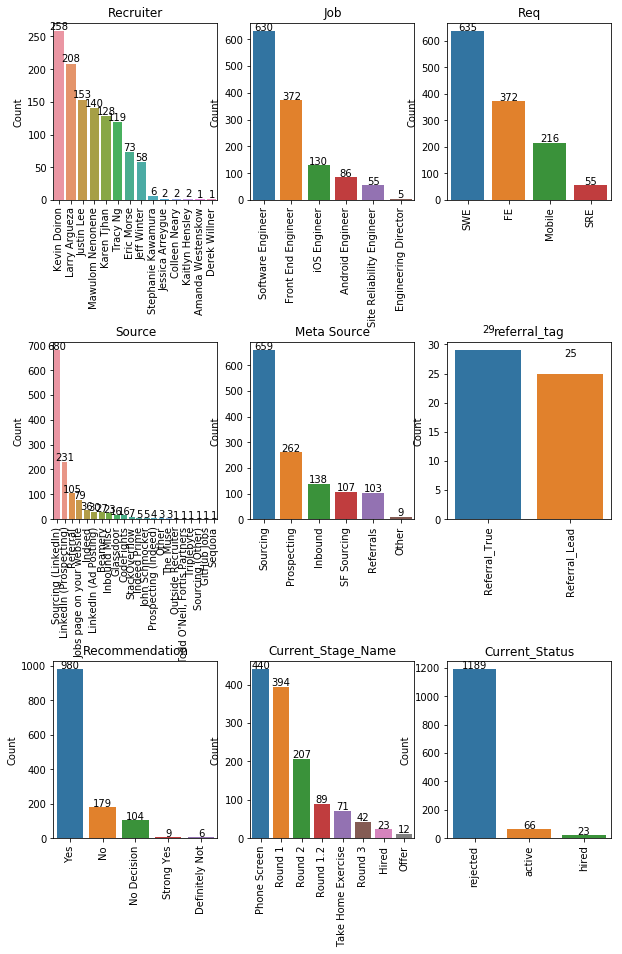

In [7]:
# Plotting each column for total count for each value for each column 
fig = plt.figure(figsize=(10,15))

for i, item in enumerate(list(df.columns)[1:-1]):
    ax = fig.add_subplot(3,3,i+1)
    g = sns.barplot(x=df[item].value_counts().index, y=df[item].value_counts(),)
    _ = plt.xticks(rotation=90)
    _ = plt.title(item)
    _ = plt.ylabel('Count')
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.0f}'.format(height),
                ha="center") 
_ = plt.subplots_adjust(hspace=.8)


It is important to structure the analysis around metrics that can be used to improve recruiting practices at Thumbtack. After a quick glance at the dataset my initial questions are:
- <b> Q1: Which candidate sources yields the best candidates (Get to round 3)?</b>
   - Are certain sources better for filing certain roles?


By understanding which sources are the most fruitful will allow talent acquisition to focus on the sources with the highest success rate. 

<b><i>My Hypothesis</i></b> is that "Referrals" will have the highest rate of "successful candidates" of sources with significant records.

 - <b> Q2: What's each recruiter's number of round 3 candidates compared to their total amount of candidates they advanced to round 1?</b>
    
The higher a recruiters round 1 / round 3 rate, then the less time-cost is sucked into the recruitment process for the engineering teams. This rate would show which recruiters are the most effective at finding and screening candidates. 

 - <b> Q3: What's each recruiter's number of offered compared to hired rate?
    
If candidates are a good fit and make it through the entire process, but decide not to take the role then maybe there was something that the recruiter could have done differently to sell the candidate on working for Thumbtack.

 - <b> Q4: How many candidates should be expected to be submitted each week / month?
    
Understanding the amount of candidates expected per week or month will allow goal setting to be achieved and allow recruiters to set their targets more accurately.





## Q1: Which candidate sources yeilds the best candidates?

   Meta Source  >=Round 3  Total    Percent
0      Inbound          5    138   3.623188
1  Prospecting         13    262   4.961832
2    Referrals         12    103  11.650485
3  SF Sourcing          8    107   7.476636
4     Sourcing         39    659   5.918058
                      Source  >=Round 3  Total    Percent
0                 CodeFights          2     16  12.500000
1                  Glassdoor          1     16   6.250000
2  Jobs page on your website          4     79   5.063291
3             John Schmocker          3      5  60.000000
4      LinkedIn (Ad Posting)          1     30   3.333333
5     LinkedIn (Prospecting)         10    231   4.329004
6                   Referral         12    105  11.428571
7        Sourcing (LinkedIn)         44    680   6.470588


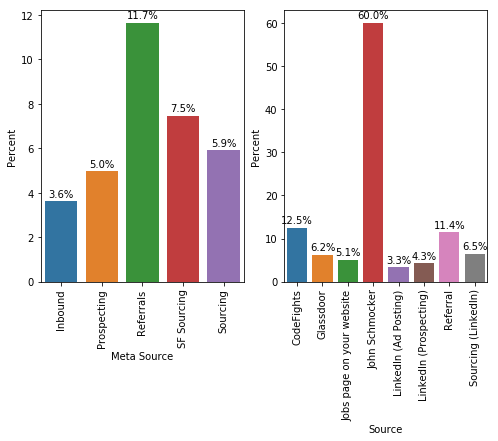

In [8]:
fig = plt.figure(figsize=(8,5))
fig.add_subplot(1,2,1)
x = df[(df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 3','Hired','Offer']))
  ].groupby(
        ['Meta Source'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'>=Round 3'}).merge(
df[ (df['Current_Status']!='Active')].groupby(
        ['Meta Source'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'Total'}), on='Meta Source')

x['Percent'] = x['>=Round 3']/x['Total']*100

print(x)
g = sns.barplot(x='Meta Source',y='Percent',data=x)
_ = plt.xticks(rotation=90)
for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height+.2,
                '{:1.1f}'.format(height)+'%',
                ha="center") 

fig.add_subplot(1,2,2)

x = df[(df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 3','Hired','Offer']))
  ].groupby(
        ['Source'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'>=Round 3'}).merge(
df[ (df['Current_Status']!='Active')].groupby(
        ['Source'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'Total'}), on='Source')

x['Percent'] = x['>=Round 3']/x['Total']*100
print(x)
g = sns.barplot(x='Source',y='Percent',data=x)
_ = plt.xticks(rotation=90)
for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height +1,
                '{:1.1f}'.format(height)+'%',
                ha="center") 

In [9]:
df[df['Meta Source']=='Sourcing']['Source'].value_counts()

Sourcing (LinkedIn)       620
Beamery                    24
LinkedIn (Prospecting)     13
Sourcing (Other)            1
Name: Source, dtype: int64

The hypothesis was true in that referrals were had the highest rate of "success" for sources with significant records. 

It is important to note that John Schmocker and CodeFights had higher rates of success, but with such low total records, may have been due to chance. I would recommend focusing on producing more candidates from these sources while monitoring their rate of success. 

Another insight is that "SF Sourcing" is yielding better resultings then "Sourcing" and should have priority when possible.

### Q1a: Are certain sources better for filling certain roles?

    Meta Source                        Job  >=Round 3  Total    Percent
0     Referrals               iOS Engineer          1      5  20.000000
1   Prospecting               iOS Engineer          3     19  15.789474
2      Sourcing               iOS Engineer          4     78   5.128205
3       Inbound               iOS Engineer          1     24   4.166667
4   SF Sourcing          Software Engineer          7     56  12.500000
5     Referrals          Software Engineer          7     69  10.144928
6      Sourcing          Software Engineer         21    298   7.046980
7       Inbound          Software Engineer          3     55   5.454545
8   Prospecting          Software Engineer          7    147   4.761905
9      Sourcing  Site Reliability Engineer          1      8  12.500000
10    Referrals         Front End Engineer          4     20  20.000000
11  SF Sourcing         Front End Engineer          1     16   6.250000
12     Sourcing         Front End Engineer          8    220   3

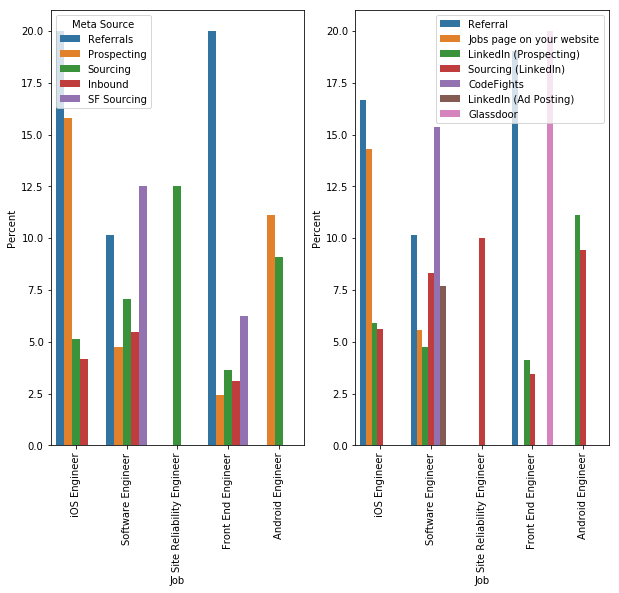

In [10]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
x = df[(df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 3','Hired','Offer']))
  ].groupby(
        ['Meta Source','Job'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'>=Round 3'}).merge(
df[(df['Current_Status']!='Active')].groupby(
        ['Meta Source','Job'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'Total'}),how='left')

x['Percent'] = x['>=Round 3']/x['Total']*100
x = x.sort_values(by=['Job','Percent'], ascending=False).reset_index(drop=True)

g = sns.barplot(x='Job', y='Percent', hue='Meta Source', data=x)
_ = plt.xticks(rotation=90)
print(x)
fig.add_subplot(1,2,2)
x = df[(df['Current_Status']!='Active') & (df['Source']!= 'John Schmocker') &
    (df['Current_Stage_Name'].isin(['Round 3','Hired','Offer']))
  ].groupby(
        ['Source','Job'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'>=Round 3'}).merge(
df[(df['Current_Status']!='Active')].groupby(
        ['Source','Job'],
        as_index=False
           )['Candidate_Id'].count().rename(columns={'Candidate_Id':'Total'}),how='left',)

x['Percent'] = x['>=Round 3']/x['Total']*100
x = x.sort_values(by=['Job','Percent'], ascending=False).reset_index(drop=True)
g = sns.barplot(x='Job', y='Percent', hue='Source', data=x,)
_ = plt.xticks(rotation=90)
_ = plt.legend(loc=1,)
print(x)

A few things stand out. 
 - Referrals tend to be the best source for most roles with a few exceptions. 
 - Software Engineering has better results from SF Sourcing
 - Mobile Engineers (IOS Engineers & Android Engineers) have better results from prospecting then Sourcing/SF Sourcing
 - CodeFights may be a good source to find quality Software Engineers 
 - Glassdoor may be a good source to find quality FE Engineers, but very low number of records

## Q2: What's each recruiter's number of round 3 candidates compared to their total amount of candidates they advanced to round 1?

In [11]:
recruiter_success = df[ (df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 3','Hired','Offer']))
  ].groupby(
        ['Recruiter'],
        as_index=False
           )['Candidate_Id'].count().merge(
df[ (df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 1','Round 2','Round 1.2','Round 3','Hired','Offer']))
  ].groupby(
        ['Recruiter'],
        as_index=False
           )['Candidate_Id'].count(), on='Recruiter').rename(columns={'Candidate_Id_x':'>=Round 3','Candidate_Id_y':'>=Round 1'})

recruiter_success['Percent'] = recruiter_success['>=Round 3'] / recruiter_success['>=Round 1']*100

recruiter_success

,Recruiter,>=Round 3,>=Round 1,Percent
0,Eric Morse,4,43,9.302326
1,Jeff Winter,3,44,6.818182
2,Justin Lee,6,77,7.792208
3,Karen Tjhan,9,93,9.677419
4,Kevin Doiron,24,166,14.457831
5,Larry Argueza,15,130,11.538462
6,Mawulom Nenonene,1,75,1.333333
7,Tracy Ng,11,103,10.679612


It is important to track this in order to gauge a recruiters success in the preliminary rounds of an interview. If a recruiter is not able to filter out candidates efficiently then there is a lot of time-cost sunk into engineers devoting time to interview candidates.

From this table I would recommend the recruiters with over 10% success rate perform a knowledge sharing exercise with the other recruiters. I would also advise the recruiters with low rates to spend more time the hiring manager to precisely understand what they are looking for in a candidate. This should be a metric that is monitored and improved in quarter over quarter.

## Q3: What's each recruiter's number of hired compared to offered rate?

In [12]:
x = df[ (df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Hired']))
  ].groupby(
        ['Recruiter'],
        as_index=False
           )['Candidate_Id'].count().merge(
df[ (df['Current_Status']!='Active') & 
    (df['Current_Stage_Name'].isin(['Round 3','Offer']))
  ].groupby(
        ['Recruiter'],
        as_index=False
           )['Candidate_Id'].count(), on='Recruiter').rename(columns={'Candidate_Id_x':'Hired','Candidate_Id_y':'Offered and Declined'})

x['Percent'] = x['Hired'] / x['Offered and Declined']*100

x

,Recruiter,Hired,Offered and Declined,Percent
0,Jeff Winter,1,2,50.000000
1,Justin Lee,3,3,100.000000
2,Karen Tjhan,4,5,80.000000
3,Kevin Doiron,5,19,26.315789
4,Larry Argueza,4,11,36.363636
5,Tracy Ng,3,8,37.500000


Having a candidate make it all the way through the interview process and then declining an offer is the greatest lost of time-cost for the company. While it is great that the recruiter was able to find a quaity candidate they weren't able to sell life at Thumbtack in order to convert them to an employee. 

I would recommend monitoring this metric and setting it as a target to improve quarter over quarter. Just as Q2 I believe that a knowledge sharing exercise would be valuable.

## Q4:Candidates Submitted over Time

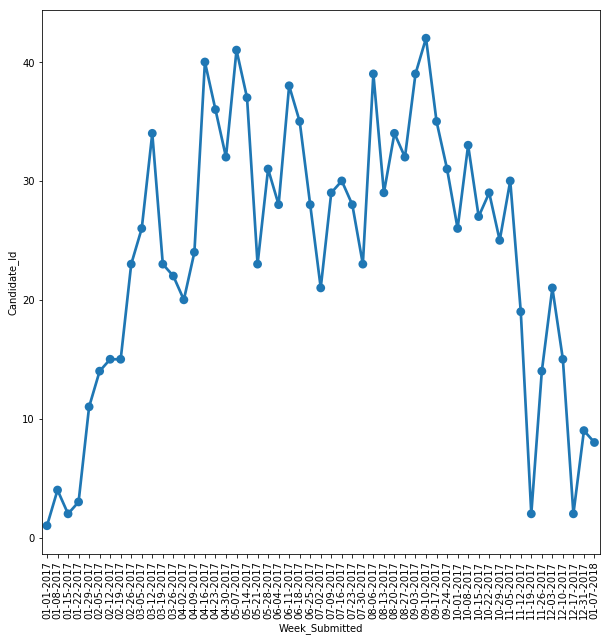

In [13]:
df['Week_Submitted'] = pd.to_datetime(df.Week_Submitted)

x= df.groupby('Week_Submitted',as_index=False)['Candidate_Id'].count()

plt.figure(figsize=(10,10))
ax = sns.pointplot(x='Week_Submitted', y='Candidate_Id',data=x)
_ = plt.xticks(rotation=90)
_ = ax.set_xticklabels(x['Week_Submitted'].dt.strftime('%m-%d-%Y'))

In [50]:
df['Month'] = df.Week_Submitted.dt.strftime('%B')
df['Month_Num'] = df.Week_Submitted.dt.month

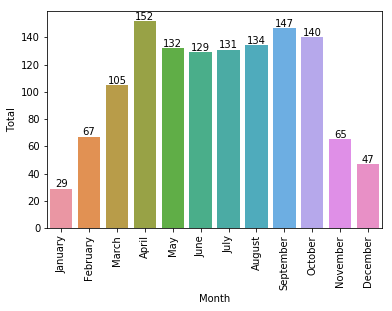

In [58]:
g = sns.barplot(x='Month', y='Total', data=
df.groupby(['Month','Month_Num'],as_index=False)['Candidate_Id'].count().rename(columns={'Candidate_Id':'Total'}).sort_values(by='Month_Num')[['Month','Total']]
           )
_ = plt.xticks(rotation=90)
for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height +1,
                '{:1.0f}'.format(height),
                ha="center") 